In [1]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
import Perceptron as Custom_Perceptron

# data exploration and pre-processing

In [2]:
df = pd.read_csv('../data/dirty_data.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)*2-1
df = pd.DataFrame(x_scaled).sample(frac=1)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8
304,-0.647059,0.507538,0.245902,-1.000000,-1.00000,-0.374069,-0.889838,-0.466667,-1.0
584,-0.058824,0.246231,0.245902,-0.515152,0.41844,-0.144560,-0.479932,0.033333,1.0
32,-0.647059,-0.115578,-0.049180,-0.777778,-0.87234,-0.260805,-0.838599,-0.966667,-1.0
628,-0.411765,0.286432,0.311475,-1.000000,-1.00000,0.031297,-0.943638,-0.200000,-1.0
488,-0.529412,-0.005025,0.180328,-0.656566,-1.00000,-0.236960,-0.815542,-0.766667,-1.0


In [6]:
df_features=df[list(range(8))]
df_target=df[8]

# Importing our own little perceptron

In [7]:
baby = Custom_Perceptron.Perceptron(n_epochs=1000,training_step=0.1)

In [8]:
X_train = df_features.iloc[:600]
X_test = df_features.iloc[601:700]
X_val = df_features.iloc[701:]

y_train = df_target.iloc[:600]
y_test = df_target.iloc[601:700]
y_val = df_target.iloc[701:]

## training our baby

100%|██████████| 1000/1000 [00:03<00:00, 303.02it/s]


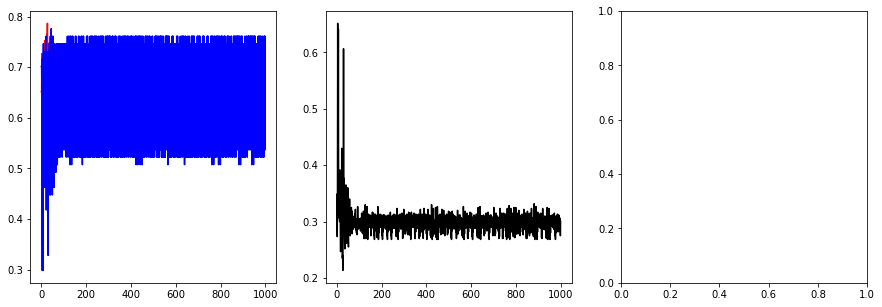

In [9]:
weights = baby.fit(X_train,y_train,X_val,y_val)
y_pred=baby.predict(X_test)
accuracy,loss,val_acc = baby.get_metrics()

In [10]:
baby.score(X_val,y_val)

0.5373134328358209

# Validating our perceptron with linearly separable data

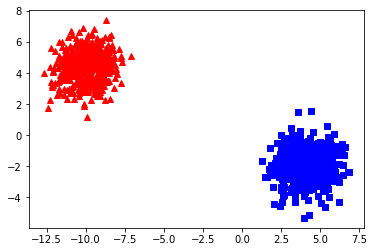

In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split



X_2, y_2 = datasets.make_blobs(n_samples=1000, centers=2, n_features=2)
y_2 = -(y_2*2-1)


X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.33, random_state=42)

fig,ax=plt.subplots(1,1)
ax.plot(X_2[:, 0][y_2 == -1], X_2[:, 1][y_2 == -1], 'r^')
ax.plot(X_2[:, 0][y_2 == 1], X_2[:, 1][y_2 == 1], 'bs')


In [12]:
baby2 = Custom_Perceptron.Perceptron(n_epochs=1000,training_step=.1)

100%|██████████| 1000/1000 [00:03<00:00, 271.25it/s]


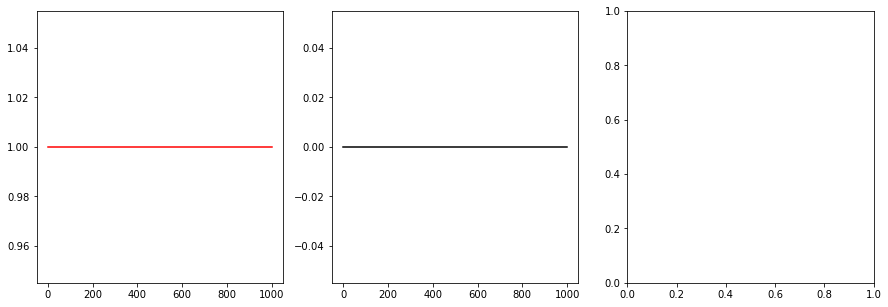

In [13]:
weights_2=baby2.fit(pd.DataFrame(X_train_2),pd.Series(y_train_2))

In [14]:
baby2.score(X_test_2,y_test_2)

1.0

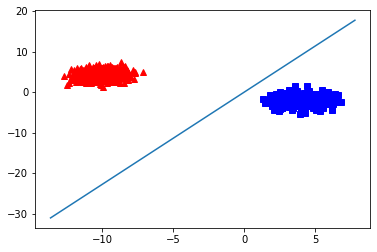

In [15]:
baby2.plot_decision_boundary(ax)
fig

# Trying other standard models

## Perceptron

In [16]:
clf = Perceptron(tol=1)
clf.fit(X_train_2,y_train_2)
clf2 = Perceptron(tol=1)
clf2.fit(X_train,y_train)

Perceptron(tol=1)

In [17]:
print(f' score of model on generated blob dataset: {clf.score(X_test_2,y_test_2)}')
print(f' score of model on diabetes dataset: {clf2.score(X_test,y_test)}')

 score of model on generated blob dataset: 1.0
 score of model on diabetes dataset: 0.6565656565656566


## Nearest neighbours

In [18]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh_2 = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_2, y_train_2)
neigh_2.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
print(f' score of model on generated blob dataset: {neigh.score(X_test_2,y_test_2)}')
print(f' score of model on diabetes dataset: {neigh_2.score(X_test,y_test)}')

 score of model on generated blob dataset: 1.0
 score of model on diabetes dataset: 0.7070707070707071


## Linear SVM

In [20]:
from sklearn.svm import LinearSVC
SVM = LinearSVC( tol=1e-5)
SVM_2 = LinearSVC( tol=1e-5)
SVM.fit(X_train_2, y_train_2)
SVM_2.fit(X_train, y_train)

LinearSVC(tol=1e-05)

In [21]:
print(f' score of model on generated blob dataset: {SVM.score(X_test_2,y_test_2)}')
print(f' score of model on diabetes dataset: {SVM_2.score(X_test,y_test)}')

 score of model on generated blob dataset: 1.0
 score of model on diabetes dataset: 0.7070707070707071


## LogReg Classifier

In [22]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression().fit(X_train_2, y_train_2)
LogReg_2 = LogisticRegression().fit(X_train, y_train)

In [23]:
print(f' score of model on generated blob dataset: {LogReg.score(X_test_2,y_test_2)}')
print(f' score of model on diabetes dataset: {LogReg_2.score(X_test,y_test)}')

 score of model on generated blob dataset: 1.0
 score of model on diabetes dataset: 0.696969696969697


## DecisionTree and RandomForest

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


DT = DecisionTreeClassifier().fit(X_train_2, y_train_2)
DT_2 = DecisionTreeClassifier().fit(X_train, y_train)

RF = RandomForestClassifier().fit(X_train_2, y_train_2)
RF_2 = RandomForestClassifier().fit(X_train, y_train)

In [25]:
print(f' score of decision tree on generated blob dataset: {DT.score(X_test_2,y_test_2)}')
print(f' score of decision tree on diabetes dataset: {DT_2.score(X_test,y_test)}')
print(f' score of random forest on generated blob dataset: {RF.score(X_test_2,y_test_2)}')
print(f' score of random forest on diabetes dataset: {RF_2.score(X_test,y_test)}')

 score of decision tree on generated blob dataset: 0.9939393939393939
 score of decision tree on diabetes dataset: 0.6565656565656566
 score of random forest on generated blob dataset: 0.9939393939393939
 score of random forest on diabetes dataset: 0.7575757575757576


## MultiLayerPerceptron

## Improving upon the perceptron - Adaline neuron

100%|██████████| 50/50 [00:00<00:00, 540.48it/s]


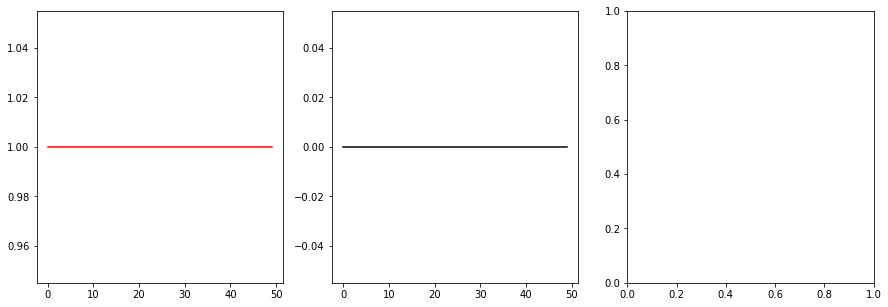

In [26]:
ada_baby = Custom_Perceptron.Perceptron(n_epochs=50,training_step=0.00001,adaline=True)
weights = ada_baby.fit(pd.DataFrame(X_train_2),pd.Series(y_train_2))


In [27]:
ada_baby.plot_decision_boundary(ax)

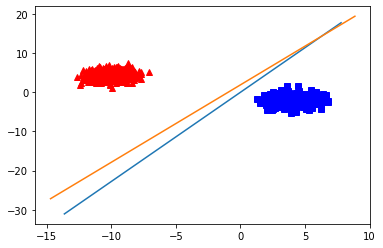

In [28]:
fig

100%|██████████| 10000/10000 [00:13<00:00, 745.95it/s]


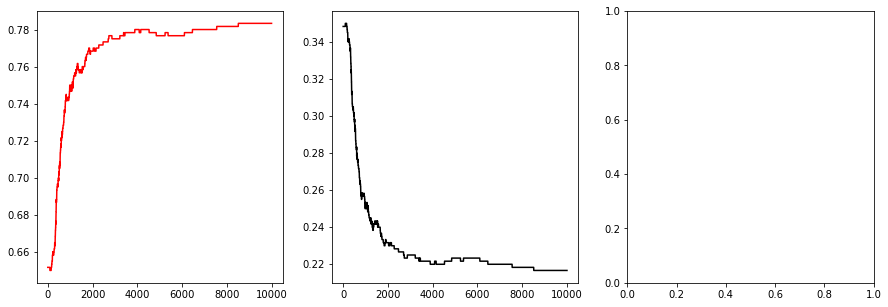

In [32]:
ada_baby = Custom_Perceptron.Perceptron(n_epochs=10000,training_step=0.00001,adaline=True)
weights = ada_baby.fit(X_train,y_train)
